# Performing Dimentionality reduction and Feature selection using Allele frequency conservation  

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path

In [22]:
def one_hot_encoding_dim_reduction(df_in,category):
    dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
    snp_data = df_in.drop(columns=dropped_columns)
    print(f"The initial features are {df_in.shape[1]}")
    encoded_categorical=pd.get_dummies(snp_data,dtype=int)
    print(f"The initial features  after one hot encoding are {encoded_categorical.shape[1]}")

    # Calculate the frequency of 1 for each SNP column
    column_frequencies = encoded_categorical.mean()
    # Set a threshold for high conservation
    conservation_threshold = 0.9
    # Identify highly conserved SNP loci
    highly_conserved_loci = column_frequencies[column_frequencies > conservation_threshold]
    # Remove columns containing '_N' from highly conserved loci
    highly_conserved_filtered = highly_conserved_loci[highly_conserved_loci.index.str.contains('_N') == False]
    # Get DataFrame with the filtered columns
    filtered_columns = highly_conserved_filtered.index.tolist()
    df_filtered = encoded_categorical[filtered_columns]
    df_filtered 
    # Select informative SNP columns
    # Combine non-categorical variables with informative SNP columns
    data_combined = pd.concat([df_in[dropped_columns], df_filtered], axis=1)
    # Get the top ten conserved alleles
    data_combined.to_csv(f"{category}.csv")
    top_ten_conserved = df_filtered.mean().nlargest(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_ten_conserved.plot(kind='bar', color='blue')
    plt.title(f'Top Ten Conserved SNPS in {category}')
    plt.xlabel('Allele')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'../../../salmonellaml/salmonellaml/figures/top_ten_conserved_SNP_{category}.png')
    plt.show()
    return data_combined

In [19]:
# load data
df=pd.read_csv("../data/nigeria_poultry_metadata.csv")
df

,Isolation source,category,BioSample,sra_accession,country,27,40,576,646,681,...,4486464,4745998,4746010,4746025,4746046,4746058,4746064,4746067,4746068,4746070
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,A,A,A,T,C,...,N,N,N,N,N,N,N,N,N,N
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N


The initial features are 245904
The initial features  after one hot encoding are 499774


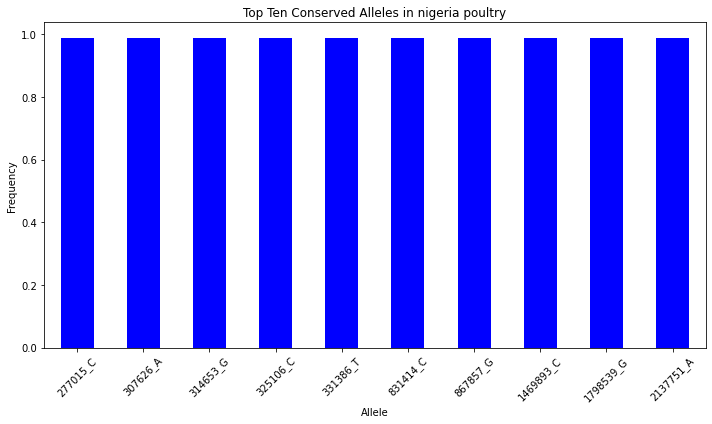

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,2493_G,3982_G,7166_A,...,4842615_G,4848025_T,4849403_T,4853392_A,4854303_C,4855592_A,4855670_C,4856751_C,4856784_C,831450_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1


In [25]:
df_poultry=one_hot_encoding_dim_reduction(df,"nigeria poultry")
df_poultry

In [28]:
# load data
df_pig=pd.read_csv("../data/nigeria_pig_metadata.csv")

The initial features are 297317
The initial features  after one hot encoding are 606544


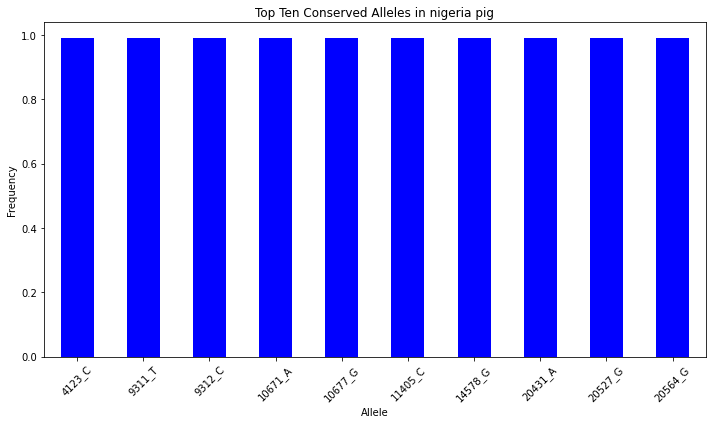

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,2955753_C,2955769_C,3113583_A,3155847_G,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
df_pig=one_hot_encoding_dim_reduction(df_pig,"nigeria pig")
df_pig

In [53]:
df_bovine=pd.read_csv("../data/nigeria_bovine_metadata.csv")

The initial features are 345183
The initial features  after one hot encoding are 705731


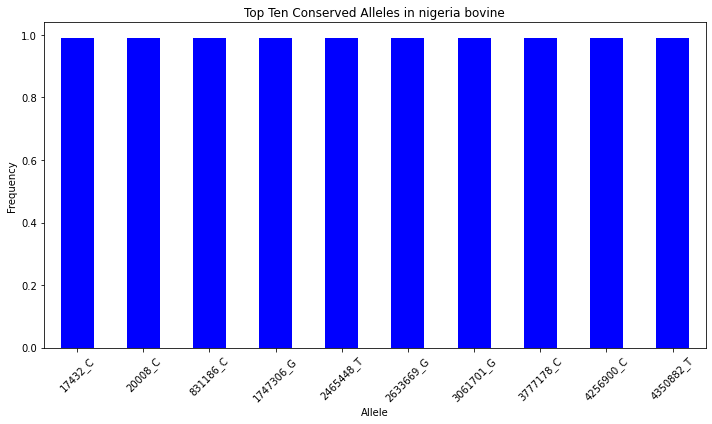

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1647_C,2088_G,2493_G,...,4844535_C,4856784_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3577698_T,3732615_A
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,beef,bovine,SAMN31852854,SRR22395760,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,beef,bovine,SAMN31852864,SRR22395764,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
101,beef,bovine,SAMN31852862,SRR22395766,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
102,beef,bovine,SAMN31852861,SRR22395767,nigeria,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [54]:
df_bovine=one_hot_encoding_dim_reduction(df_bovine,"nigeria bovine")
df_bovine

In [ ]:
# Identify columns that are in one category that are not in another one

In [31]:
# Find unique columns in both DataFrames
unique_columns_poultry = list(set(df_poultry.columns) ^ set(df_pig.columns))
unique_columns_poultry

['60339_C',
 '1993049_A',
 '3918057_C',
 '2106554_C',
 '3016958_T',
 '276427_G',
 '4768228_G',
 '1917490_T',
 '2645170_G',
 '2527487_A',
 '4393336_C',
 '4111383_G',
 '2930280_G',
 '3516946_C',
 '4489488_C',
 '2828170_G',
 '3860838_G',
 '3634608_A',
 '3653679_C',
 '3403628_G',
 '2594560_G',
 '1741440_A',
 '769596_G',
 '256720_C',
 '1303010_G',
 '3816518_A',
 '1405051_G',
 '2268126_C',
 '1457739_A',
 '3408998_G',
 '3270468_C',
 '1791747_C',
 '4500936_T',
 '3941797_C',
 '3477127_G',
 '1877784_C',
 '4264066_G',
 '193298_C',
 '4244438_G',
 '3836000_G',
 '2425031_G',
 '2569472_G',
 '67382_C',
 '921130_A',
 '1492080_T',
 '1981783_C',
 '2670304_T',
 '90342_G',
 '3847115_C',
 '3339040_C',
 '545389_G',
 '447166_C',
 '2406940_T',
 '4755955_G',
 '3149817_G',
 '1191586_C',
 '4853889_G',
 '1744584_T',
 '174037_G',
 '2023261_G',
 '3273488_A',
 '4227751_G',
 '951899_C',
 '4063936_G',
 '1451169_A',
 '2838691_G',
 '3538986_G',
 '1285860_G',
 '3840160_A',
 '1384352_C',
 '1468491_C',
 '709248_G',
 '323527

In [32]:
unique_columns_pig = list(set(df_pig.columns) ^ set(df_poultry.columns))
unique_columns_pig

['60339_C',
 '1993049_A',
 '4768228_G',
 '276427_G',
 '1917490_T',
 '2645170_G',
 '2527487_A',
 '2930280_G',
 '3516946_C',
 '2828170_G',
 '3634608_A',
 '3653679_C',
 '256720_C',
 '1303010_G',
 '2268126_C',
 '1457739_A',
 '3408998_G',
 '3270468_C',
 '3941797_C',
 '3477127_G',
 '1877784_C',
 '193298_C',
 '4244438_G',
 '3836000_G',
 '67382_C',
 '921130_A',
 '1492080_T',
 '1981783_C',
 '2670304_T',
 '3339040_C',
 '447166_C',
 '3149817_G',
 '1744584_T',
 '2023261_G',
 '3273488_A',
 '951899_C',
 '1451169_A',
 '3538986_G',
 '1384352_C',
 '709248_G',
 '3705046_G',
 '2716708_T',
 '2478621_A',
 '1563426_C',
 '3292875_C',
 '4059825_G',
 '3390282_G',
 '2271178_G',
 '620132_C',
 '1242244_A',
 '1012360_T',
 '2554900_T',
 '2470448_A',
 '2550616_C',
 '1862790_C',
 '420331_C',
 '4130838_C',
 '428412_T',
 '2606375_G',
 '2580857_C',
 '1241173_C',
 '3690082_A',
 '1225236_C',
 '2620717_T',
 '694241_T',
 '4118427_T',
 '3254608_T',
 '2394895_A',
 '1207487_A',
 '2490693_A',
 '1209421_G',
 '3446519_A',
 '44895

In [35]:
# Find common columns in both DataFrames
common_columns = list(set(df_poultry.columns) & set(df_pig.columns))
print("Common columns:", len(common_columns))

Common columns: 1166


In [56]:
#common columns
# common_columns = set(df1.columns) & set(df2.columns) & set(df3.columns)
common_columns = set(df_poultry.columns) & set(df_pig.columns)  & set(df_bovine.columns)
common_columns
# # Initialize a list to store columns to drop
columns_to_drop = []

# Check if the SNP values are the same in all dataframes
for col in common_columns:
    if all(df_poultry[col].isin([0, 1])) and all(df_pig[col].isin([0, 1]))  and all(df_bovine[col].isin([0, 1])) :
        if not (df_poultry[col].nunique() == 1 or df_pig[col].nunique() == 1 or df_bovine[col].nunique() == 1):
            columns_to_drop.append(col)

# Drop the common columns with varying SNP values
df_poultry.drop(columns=columns_to_drop, inplace=True)
df_pig.drop(columns=columns_to_drop, inplace=True)
df_bovine.drop(columns=columns_to_drop, inplace=True)

In [57]:
df_all=pd.concat([df_poultry,df_bovine,df_pig])
df_all

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,7166_A,7505_C,9673_G,...,187701_C,1073652_T,2955753_C,2955769_C,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
df_modified=df_all.fillna(0)

In [ ]:
df_modified.to_csv("training_data_encoded.csv")